<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Data-Science/Deep%20Learning/from%20tensorflow/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing relevant libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Using tensorflow module
import tensorflow_datasets as tfds

### LOAD DATASET

In [ ]:
#Downloaded the fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#Checking the label
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#Not stored in the dataset as too be stored manually
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###  CHECK FORMAT

In [ ]:
#checked the shape of the images
train_images.shape
#60000 images for the train dataset of 28 by 28 pixels

(60000, 28, 28)

In [ ]:
len(train_labels)
#60,000 labels of the train dataset

60000

In [ ]:
train_labels[0]

9

In [ ]:
test_images.shape
#Test dataset having 10,000 images of 28 by 28 pixels also

(10000, 28, 28)

In [ ]:
len(test_labels)
#10,000 labels of the train dataset

10000

### Preprocessing

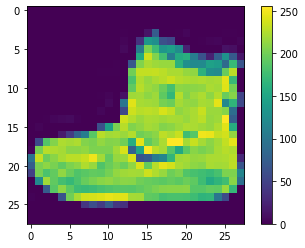

In [ ]:
#Exploring the image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images /255.0
test_images = test_images /255.0

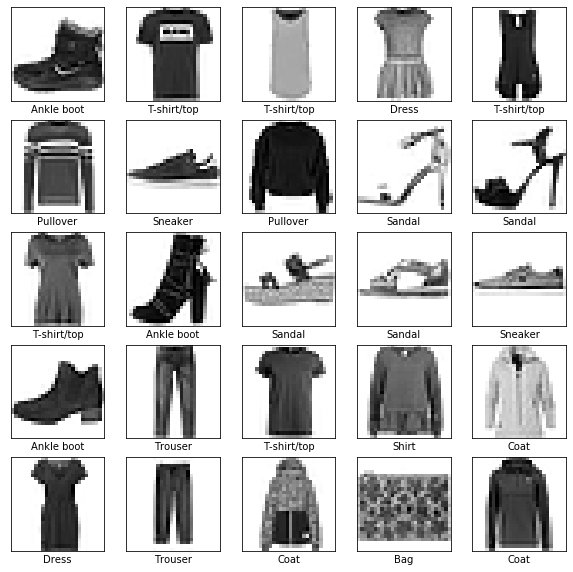

In [ ]:
#To verify that the data is in the correct format and that you're ready to build and train the network, 
#let's display the first 25 images from the training set and display the class name below each image.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### TRying to SET VALIDATION SAMPLE


In [ ]:
num_validation = 0.1 * len(train_images)

In [ ]:
num_validation
#it did not work

6000.0

BUFFER_SIZE = 10000
# this BUFFER_SIZE parameter is here for cases when we're dealing with enormous datasets
# then we can't shuffle the whole dataset in one go because we can't fit it all in memory
# so instead TF only stores BUFFER_SIZE samples in memory at a time and shuffles them
# if BUFFER_SIZE=1 => no shuffling will actually happen
# if BUFFER_SIZE >= num samples => shuffling is uniform
# BUFFER_SIZE in between - a computational optimization to approximate uniform shuffling

# luckily for us, there is a shuffle method readily available and we just need to specify the buffer size
shuffled_train_and_validation_data = train_images.shuffle(BUFFER_SIZE)


###  MODEL

In [ ]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),
    
])

model.compile(optimizer = 'rmsprop',  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### TRAIN OUR MODEL

In [ ]:
model.fit(train_images, train_labels, epochs = 10, verbose = 2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 9s - loss: 1.7522 - accuracy: 0.7143
Epoch 2/10
60000/60000 - 7s - loss: 1.7119 - accuracy: 0.7491
Epoch 3/10
60000/60000 - 7s - loss: 1.7002 - accuracy: 0.7606
Epoch 4/10
60000/60000 - 6s - loss: 1.6938 - accuracy: 0.7662
Epoch 5/10
60000/60000 - 8s - loss: 1.6881 - accuracy: 0.7715
Epoch 6/10
60000/60000 - 7s - loss: 1.6060 - accuracy: 0.8561
Epoch 7/10
60000/60000 - 7s - loss: 1.5923 - accuracy: 0.8696
Epoch 8/10
60000/60000 - 6s - loss: 1.5889 - accuracy: 0.8724
Epoch 9/10
60000/60000 - 8s - loss: 1.5857 - accuracy: 0.8757
Epoch 10/10
60000/60000 - 9s - loss: 1.5836 - accuracy: 0.8776


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5999 - accuracy: 0.8614

Test accuracy: 0.8614


In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[12])

5

In [ ]:
predictions[12]

array([6.1534979e-18, 2.3591357e-19, 4.9554151e-15, 7.0504332e-14,
       4.2312486e-19, 9.9995220e-01, 5.6898432e-17, 1.3824081e-05,
       3.3941800e-05, 6.1762547e-13], dtype=float32)

In [ ]:
100*np.max(predictions[12])

99.99521970748901

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

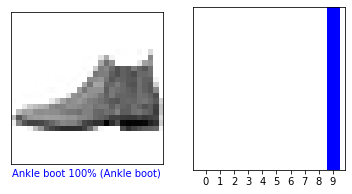

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

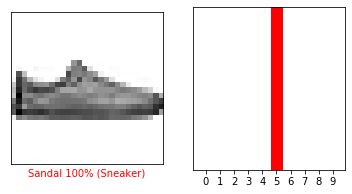

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

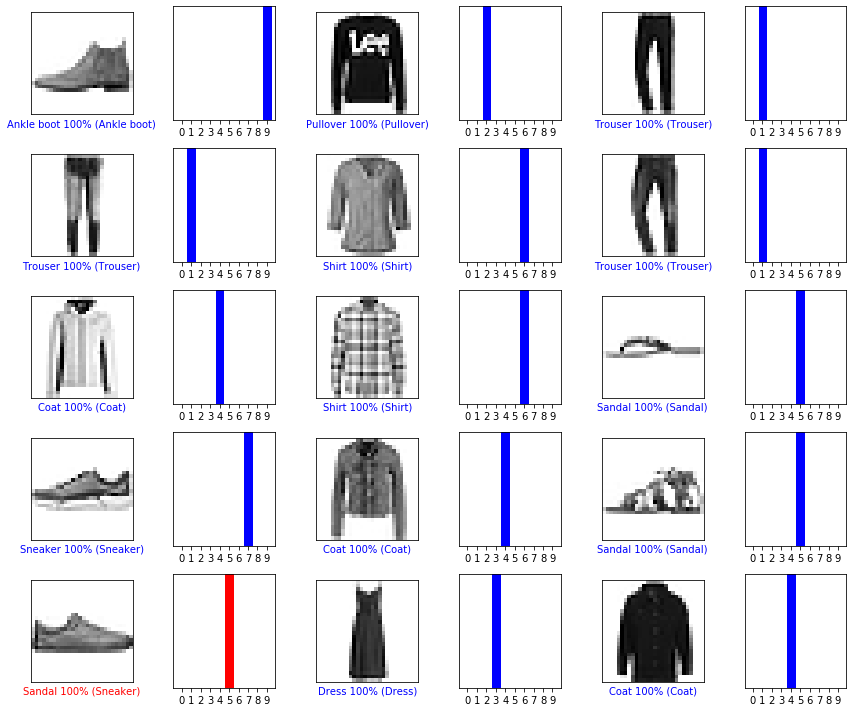

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0505611e-29 4.7546743e-37 1.0000000e+00 3.5941203e-33 3.2809702e-26
  5.4077228e-30 7.3415889e-26 0.0000000e+00 2.5463408e-24 0.0000000e+00]]


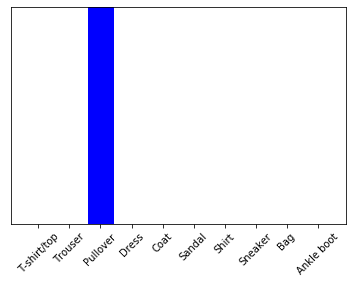

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2